In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 16.1MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [15]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        missing_image_path = f"/content/missingpoint{i}.jpg"
        addMissingPointsToNoisyImage(image_path, missing_image_path)
        print(f"missing_image for {image_path} generated and saved as {missing_image_path}")

def addMissingPointsToNoisyImage(input_path, output_path, missing_ratio=0.03):
    # Open the noisy image.
    image = Image.open(input_path)

    # Determine the image's width and height in pixels.
    width, height = image.size

    # Load pixel values for the image.
    pix = image.load()

    # Calculate the number of total points in the image.
    total_points = sum(1 for i in range(width) for j in range(height))

    # Calculate the desired number of missing points based on the specified ratio.
    num_missing_points = int(total_points * (1 - missing_ratio))

    # Create a list of all pixels in the image.
    all_pixels = [(i, j) for i in range(width) for j in range(height)]

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Shuffle the list of pixels to add randomness.
    random.shuffle(all_pixels)

    # Loop until the desired number of missing points is reached.
    for i in range(num_missing_points):
        # Get the next pixel in the shuffled list.
        x, y = all_pixels[i]

        # Set the pixel color to create a missing point.
        draw.point((x, y), (255, 255, 255))

    # Save the final image with missing points as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and add missing points to them
generateNoisyImages()


missing_image for /content/1.jpg generated and saved as /content/missingpoint1.jpg
missing_image for /content/2.jpg generated and saved as /content/missingpoint2.jpg
missing_image for /content/3.jpg generated and saved as /content/missingpoint3.jpg
missing_image for /content/4.jpg generated and saved as /content/missingpoint4.jpg
missing_image for /content/5.jpg generated and saved as /content/missingpoint5.jpg


<ipython-input-15-8d981ab1f591>:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_points = sum(1 for i in range(width) for j in range(height))


In [2]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

In [3]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 10000
    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


missingpoint5.jpg
Output Vectors Table:
0.862600 0.842700 0.827200 0.864700 0.861400 
0.000018 0.000016 0.000014 0.000019 0.000018 
0.000000 0.000000 0.000000 0.000000 0.000000 
Last Output Vector: 4.973599999999996e-10 2.1079999999999924e-10 0 5.275999999999992e-10 4.800800000000014e-10
The highest positive output value is associated with class 4


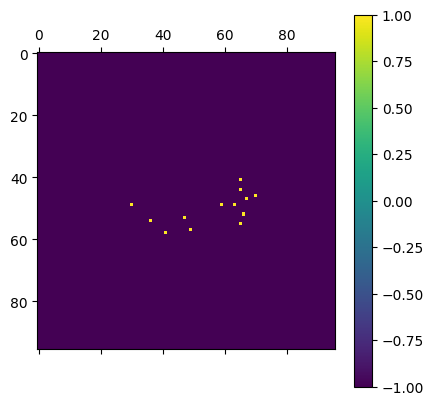

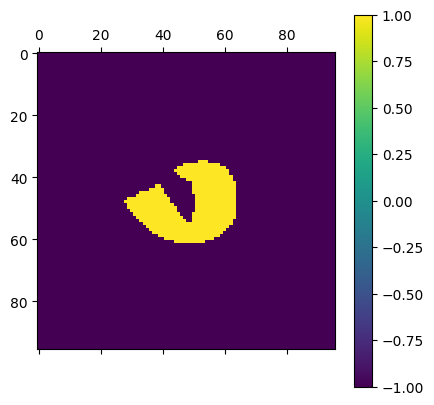

In [23]:
from pylab import *
from math import sqrt
import matplotlib.pyplot as plt
import os

# Define the path to the input image
IMAGE_PATH = "/content/missingpoint5.jpg"

def show(matrix):
    """
    Display a matrix in a formatted manner.

    Args:
        matrix (list of lists): The matrix to be displayed.
    """
    for j in range(len(matrix)):
        for i in range(len(matrix[0])):
            print("{:3f}".format(matrix[j][i]), end=" ")
        print(sep="")

def change(vector, a, b):
    """
    Transform a vector into a matrix of specified dimensions.

    Args:
        vector (list): The vector to be transformed.
        a (int): The number of columns in the resulting matrix.
        b (int): The number of rows in the resulting matrix.

    Returns:
        list of lists: The transformed matrix.
    """
    matrix = [[0 for j in range(a)] for i in range(b)]
    k = 0
    j = 0
    while k < b:
        i = 0
        while i < a:
            matrix[k][i] = vector[j]
            j += 1
            i += 1
        k += 1
    return matrix

def product(matrix, vector, T):
    """
    Multiply a matrix by a vector.

    Args:
        matrix (list of lists): The matrix to be multiplied.
        vector (list): The vector to be multiplied.
        T (float): The threshold parameter for the activation function.

    Returns:
        list: The resulting vector after multiplication.
    """
    result_vector = []
    for i in range(len(matrix)):
        x = 0
        for j in range(len(vector)):
            x = x + matrix[i][j] * vector[j]
        result_vector.append((x + T))
    return result_vector

def action(vector, T, Emax):
    """
    Activation function to process a vector.

    Args:
        vector (list): The input vector to be processed.
        T (float): The threshold parameter for the activation function.
        Emax (float): The maximum allowable value for the difference in output vectors between consecutive iterations.

    Returns:
        list: The output vector after activation.
    """
    result_vector = []
    for value in vector:
        if value <= 0:
            result_vector.append(0)
        elif 0 < value <= T:
            result_vector.append(Emax * value)
        elif value > T:
            result_vector.append(T)
    return result_vector

def mysum(vector, j):
    """
    Calculate the sum of vector values excluding the element at index j.

    Args:
        vector (list): The input vector.
        j (int): The index of the element to be excluded from the sum.

    Returns:
        float: The sum of vector values with the element at index j excluded.
    """
    p = 0
    total_sum = 0
    while p < len(vector):
        if p != j:
            total_sum = total_sum + vector[p]
        p += 1
    return total_sum

def norm(vector, p):
    """
    Calculate the difference between two vectors and compute the norm of the resulting vector.

    Args:
        vector (list): The first vector.
        p (list): The second vector for subtraction.

    Returns:
        float: The Euclidean norm of the difference between the two vectors.
    """
    difference = []
    for i in range(len(vector)):
        difference.append(vector[i] - p[i])
    sum = 0
    for element in difference:
        sum += element * element
    return sqrt(sum)

# List of paths to example images
path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.0001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
show(y)
print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()